#### 同步的稳定性

In [108]:
import os
import sys
sys.path.append(r"../")
import numpy as np
import matplotlib.pyplot as plt
from numba import njit, prange
from import_fun import Lorenz, to_laplacian

In [109]:
# 连接矩阵，及其特征值
conn = np.array([[0, 1],[1, 0]])
laplacian = to_laplacian(conn)

eigenvalues = np.linalg.eigvals(laplacian)
print(np.sort(eigenvalues))

[0. 2.]


In [110]:
N = 2
dt = 0.01
method = 'euler'    # （"euler", "rk4"）

In [111]:
nodes = Lorenz(N, method, dt)
nodes.vars_nodes[0] = 1.5
nodes.vars_nodes[1] = -1.5
nodes.vars_nodes[2] = 20

In [112]:
gc = 5

for i in range(100_00):
    nodes()

mem = []
time = []

nodes.t = 0

for i in range(10_00):
    I = -gc * laplacian @ nodes.vars_nodes[1]  
    nodes(I)
    mem.append(nodes.vars_nodes[0].copy())
    time.append(nodes.t)

nodes.vars_nodes[0] += 0.01*np.random.rand(N) 

for i in range(20_00):
    I = -gc * laplacian @ nodes.vars_nodes[1]
    nodes(I)
    mem.append(nodes.vars_nodes[0].copy())
    time.append(nodes.t)

In [113]:
nodes = Lorenz(N, method, dt)
nodes.vars_nodes[0] = 1.5
nodes.vars_nodes[1] = -1.5
nodes.vars_nodes[2] = 20

In [114]:
gc = 0.5

for i in range(100_00):
    nodes()

mem1 = []
time1 = []

nodes.t = 0

for i in range(10_00):
    I = -gc * laplacian @ nodes.vars_nodes[1]  
    nodes(I)
    mem1.append(nodes.vars_nodes[0].copy())
    time1.append(nodes.t)

nodes.vars_nodes[0] += 0.01*np.random.rand(N) 

for i in range(20_00):
    I = -gc * laplacian @ nodes.vars_nodes[1]
    nodes(I)
    mem1.append(nodes.vars_nodes[0].copy())
    time1.append(nodes.t)

In [115]:
nodes = Lorenz(N, method, dt)
nodes.vars_nodes[0] = 1.5
nodes.vars_nodes[1] = -1.5
nodes.vars_nodes[2] = 20

In [116]:
gc = 12.5

for i in range(100_00):
    nodes()

mem2 = []
time2 = []

nodes.t = 0

for i in range(10_00):
    I = -gc * laplacian @ nodes.vars_nodes[1]  
    nodes(I)
    mem2.append(nodes.vars_nodes[0].copy())
    time2.append(nodes.t)

nodes.vars_nodes[0] += 0.01*np.random.rand(N) 

for i in range(20_00):
    I = -gc * laplacian @ nodes.vars_nodes[1]
    nodes(I)
    mem2.append(nodes.vars_nodes[0].copy())
    time2.append(nodes.t)

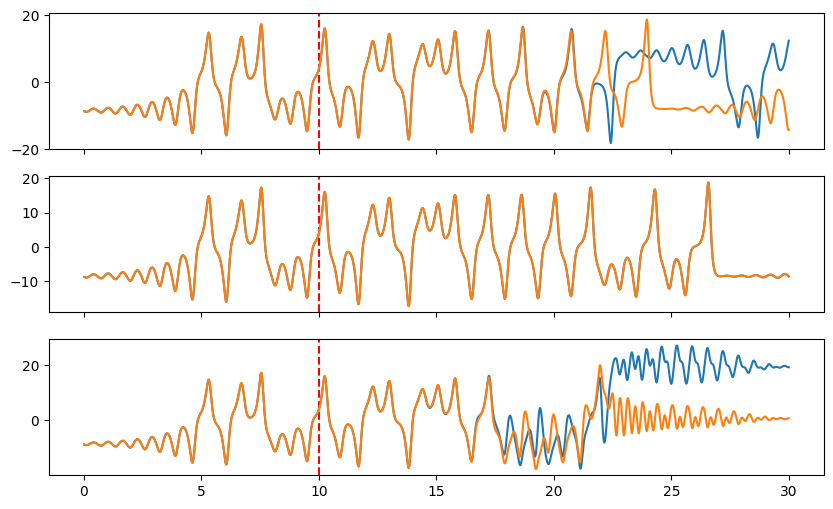

In [117]:
fig, axs = plt.subplots(3, 1, figsize=(10, 6), sharex=True)
axs[0].axvline(x=10, color='r', linestyle='--')
axs[0].plot(time1, mem1)

axs[1].axvline(x=10, color='r', linestyle='--')
axs[1].plot(time, mem)

axs[2].axvline(x=10, color='r', linestyle='--')
axs[2].plot(time2, mem2)
plt.show()